## Ultimate Challenge

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# loading the logins DataFrame 

logins_df = pd.read_json("C:\\Users\\hanna\\Downloads\\1631809090_1481053515_ultimate_challenge_3_\\ultimate_challenge\\logins.json")
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [48]:
print("info")
print(logins_df.info())

print("")

print("statistics")
print(logins_df.describe())

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.7 KB
None

statistics
                 login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38


In [49]:
# we create a column to check for amount of logins in the 15 M time frame


logins_df['count'] = int(1)
logins_df = logins_df.set_index('login_time')


logins_df = logins_df.resample('15T').count()
logins_df = logins_df.reset_index()



logins_df.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

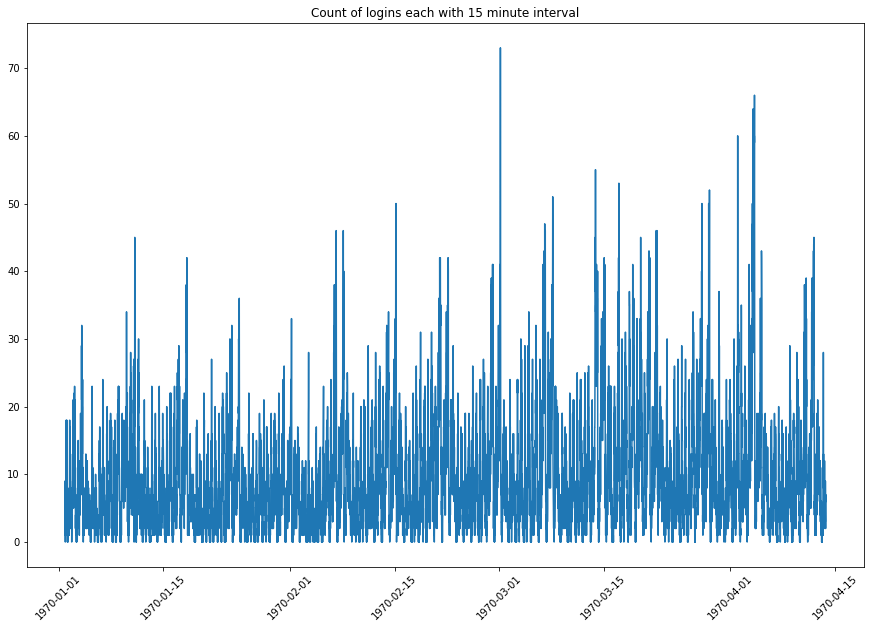

In [50]:

x = logins_df['login_time']
y = logins_df['count']

plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.title('Count of logins each with 15 minute interval')
plt.xticks(rotation = 45)

We see a lot of spike movement towards the start of the months. to dig deeper, instead of looking at all of the months, we can just look for each month one at a time. 

In [51]:
jan = logins_df[(logins_df.login_time > '1970-01') & (logins_df.login_time < '1970-02')]
feb = logins_df[(logins_df.login_time > '1970-02') & (logins_df.login_time < '1970-03')]
mar = logins_df[(logins_df.login_time > '1970-03') & (logins_df.login_time < '1970-04')]
apr = logins_df[(logins_df.login_time > '1970-04') & (logins_df.login_time < '1970-05')]

In [52]:
def make_plots(data):
    x = data['login_time']
    y = data['count']
    plt.figure(figsize=(10, 8))
    plt.plot(x , y)
    plt.title('Count of logins each with 15 minute interval')
    plt.xticks(rotation = 45)

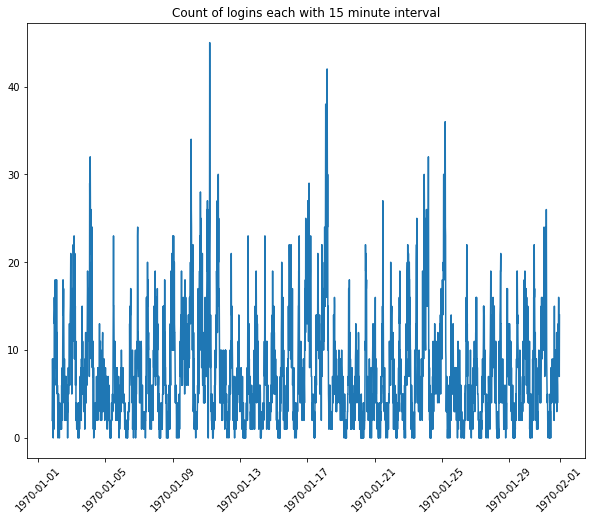

In [53]:
make_plots(jan)

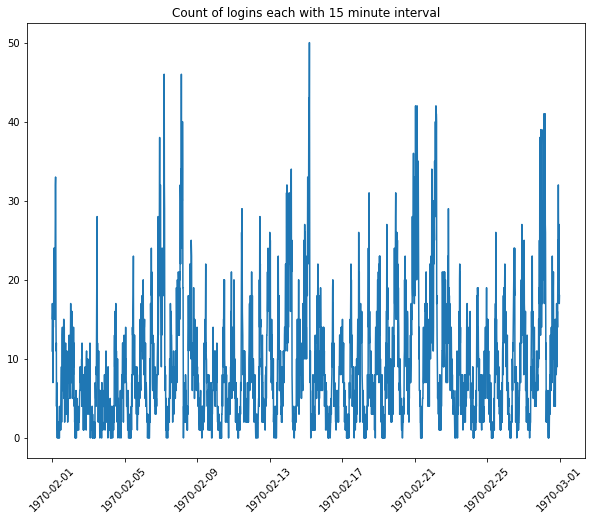

In [54]:
make_plots(feb)

just by these two months, it is not clear if there seems to be more weekend logins than weekday logins. Let us see which day of the week had the most logins by using the dt function. To dive deeper, we will also see which hours of the day we see the most logins.

In [55]:
logins_df['weekday'] = logins_df['login_time'].dt.dayofweek

days = logins_df.sort_values(by='count', ascending = True)

day_comparison = days[['count', 'weekday']]
day_comparison = day_comparison.groupby('weekday').sum().reset_index()

day_comparison

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


Text(0.5, 1.0, 'Logins by weekday comparison')

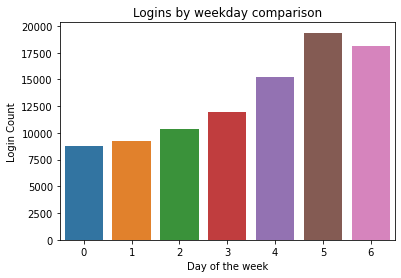

In [56]:
sns.barplot(x = 'weekday', y = 'count', data = day_comparison)
plt.ylabel('Login Count')
plt.xlabel('Day of the week')
plt.title('Logins by weekday comparison')

It is evident that the weekly spikes correspond to logins during the weekends. As we can see,most logins happen on Saturdays, followed by Sunday and Friday. 

    hour  count
22    22   6607
1      1   6317
23    23   6058
0      0   5993
2      2   5800


Text(0.5, 1.0, 'Logins by hours comparison')

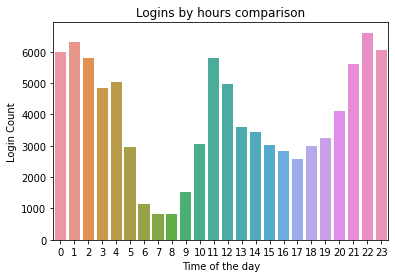

In [57]:
logins_df['hour'] = logins_df['login_time'].dt.hour

hours = logins_df[['count', 'hour']]
hours = hours.groupby('hour').sum().reset_index()
print(hours.sort_values(by=['count'], ascending = False).head())

sns.barplot(x = 'hour', y = 'count', data = hours)
plt.ylabel('Login Count')
plt.xlabel('Time of the day')
plt.title('Logins by hours comparison')

It is evident that we see more logins around 11 am, and even more past 9 pm - 1 am.

- What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

- Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the
       observation
    - how you would interpret the results and provide recommendations to the city
       operations team along with any caveats.


To answer this, we must think of the main goal - to make profit and to provide better service. Better service will be provided when there are more available drivers and riders so the wait time is less. To get more drivers and riders, we need more signups.

A simple way to conduct a study would A/B testing as we can divide the crowd into two groups, one group will receive reimbursements, while the other does not. What we are trying to find out is that does the reimbursement lead to greater availability, in other words, is it an attractive approach to bring in more drivers and profitability? 

In [58]:
import json
import pandas as pd

file = "C:\\Users\\hanna\\Downloads\\1631809090_1481053515_ultimate_challenge_3_\\ultimate_challenge\\ultimate_data_challenge.json"
with open(file, 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [59]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [60]:
print("Statistics")
print(df.describe())

print("")

print("Info")
print(df.info())

Statistics
       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%    

We see some inconsistency, (avg_rating_of_driver & avg_rating_by_driver & phone) variables are missing values, we will fill the first two columns with mean and variable phone with median, as it is a categorical variable.

In [61]:
# Impute in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [62]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

Since we also have a signup date and the last trip date, creating a time delta that records the length of this period. The instruction indicates that if a rider took a ride within 30 days, he is considered active. It will help if we identified a column and count for how many active users we do have and do not. 

Let us change the column dypes to datetime so we can subtract last date from signup to create a timedelta.

In [63]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

# print(df.signup_date.dtype)
# print(df.last_trip_date.dtype)


df.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

so any user after 2014-06-01 is considered an active user, whereas any user before that date is considered inactive. Let us define an active user variable.

In [64]:
date = df.last_trip_date.max() + pd.Timedelta('-30days')

df['active_user'] = np.where(df['last_trip_date'] >= date, 1, 0)

print(df.head())
print("")
print("Retained users")
print(df.active_user.value_counts(normalize = True))



             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  active_user  
0         46.2      3.67      

We see that Aprroximately 38% of users were retained (active users). 

In [65]:
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)

df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [66]:
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


Let us standardize some of the columns so we do not have any values confusing the model. 

In [67]:
from sklearn.preprocessing import StandardScaler
c_vars = ['avg_rating_of_driver', 'surge_pct',
           'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

scaler = StandardScaler()
df_encoded[c_vars]=scaler.fit_transform(df_encoded[c_vars])
df_encoded.head(5)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,0.174240,1.10,0.328202,-0.397131,-0.372650,0.497684,1,0,1,0,0,1,0,1
1,0,0.705241,1.00,-0.443394,-0.294653,0.431583,0.497684,0,1,0,0,1,0,1,0
2,3,-0.533761,1.00,-0.443394,1.053741,-0.880771,0.497684,0,1,0,0,0,1,1,0
3,9,-0.002760,1.14,0.558679,0.514383,-0.602181,0.273342,1,0,1,0,0,1,0,1
4,14,-0.356760,1.19,0.147829,0.579106,-0.467266,0.273342,0,0,0,1,1,0,1,0


In [68]:
X = df_encoded.drop(['active_user'], axis = 1)
y = df_encoded['active_user']

creating a function to test model performance

In [69]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc


def Evaluation(y_test , predictions):
    print("precision_score1:",precision_score(y_test, predictions) )
    print("recall_score1:",recall_score(y_test, predictions))
    print("f1_score1:",f1_score(y_test, predictions))
    print("roc_auc score",roc_auc_score(y_test, predictions) )
    print("")

    print("[Test Classification Report]") 
    print(classification_report(y_test, predictions))
    print("")
    
    #condusion metrics
    cm = confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(predictions, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)


    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

Creating the Train/Test Split.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 2022)

print("\n")
print("X_train:", type(X_train), X_train.shape, len(X_train)) 

print("\n")
print("X_test", type(X_test), X_test.shape, len(X_test)) 

print("\n")
print("y_train", type(y_train), y_train.shape, len(y_train)) 

print("\n")
print("y_test", type(y_test), y_test.shape, len(y_test)) 



X_train: <class 'pandas.core.frame.DataFrame'> (37500, 14) 37500


X_test <class 'pandas.core.frame.DataFrame'> (12500, 14) 12500


y_train <class 'pandas.core.series.Series'> (37500,) 37500


y_test <class 'pandas.core.series.Series'> (12500,) 12500


- Let us create a model without resampling the data, once we do, we will resample the data to have equal weights on both classes

In [71]:
y_train.value_counts(normalize = True)

0    0.62392
1    0.37608
Name: active_user, dtype: float64

In [72]:
y_test.value_counts(normalize = True)

0    0.62392
1    0.37608
Name: active_user, dtype: float64

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Model
rf = RandomForestClassifier(n_estimators = 100, random_state = 2022)

# fit using train, predict using test
rf.fit(X_train , y_train)

RandomForestClassifier(random_state=2022)

In [74]:
y_pred = rf.predict(X_test)

precision_score1: 0.6903820816864296
recall_score1: 0.6687938736439055
f1_score1: 0.6794165316045381
roc_auc score 0.7440007321803321

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      7799
           1       0.69      0.67      0.68      4701

    accuracy                           0.76     12500
   macro avg       0.75      0.74      0.75     12500
weighted avg       0.76      0.76      0.76     12500




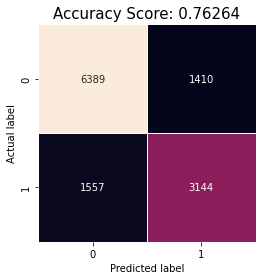

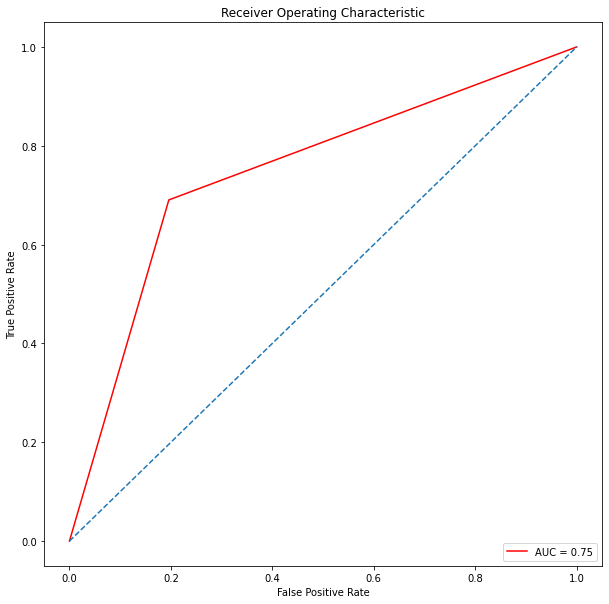

In [75]:
Evaluation(y_test, y_pred)

It is visual that one class is doing better than the other, hence impacting the performance of the model.

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 2022)
X_smote, y_smote = smote.fit_resample(X_train, y_train)



In [77]:
X_smote.shape, y_smote.shape


((46794, 14), (46794,))

In [78]:
y_smote.value_counts(normalize = True)

1    0.5
0    0.5
Name: active_user, dtype: float64

In [79]:
rft = RandomForestClassifier(n_estimators = 100, random_state = 2022)

# fit using train, predict using test
rft.fit(X_smote , y_smote)

y_pred_smote = rft.predict(X_test)

precision_score1: 0.6651200322775872
recall_score1: 0.7013401403956605
f1_score1: 0.6827500517705529
roc_auc score 0.7442461696977661

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      7799
           1       0.67      0.70      0.68      4701

    accuracy                           0.75     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.75      0.76     12500




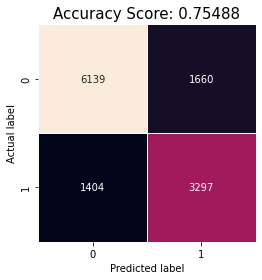

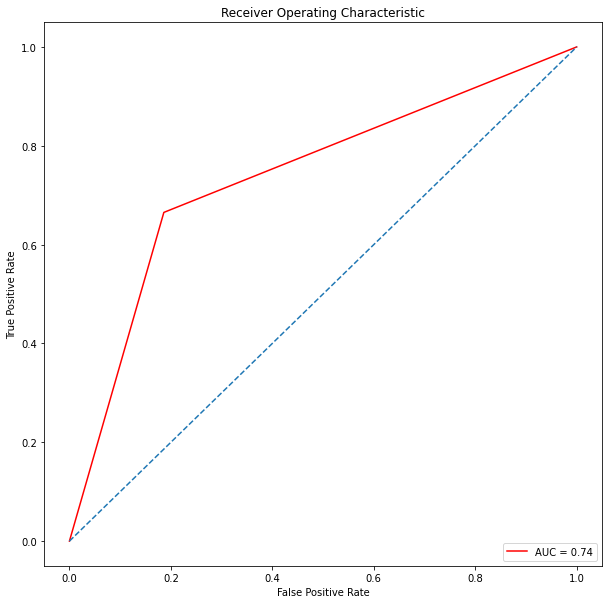

In [80]:
Evaluation(y_test, y_pred_smote)

There is not much of a difference between a model whose y values are resampled and whose y values are not. Let us check for difference in feature importances. 

In [92]:
feature_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False)
feature_imp = pd.DataFrame(feature_imp).reset_index()

feature_imp = feature_imp.rename({'index': 'features', 0: 'importance'}, axis=1)  
feature_imp

,features,importance
0,avg_dist,0.300013
1,weekday_pct,0.129822
2,avg_rating_by_driver,0.115237
3,surge_pct,0.086637
4,avg_rating_of_driver,0.081736
5,trips_in_first_30_days,0.078338
6,avg_surge,0.062180
7,city_King's Landing,0.050712
8,phone_Android,0.018933
9,phone_iPhone,0.018752


In [93]:
feature_imp_2 = pd.Series(rft.feature_importances_, index = X.columns).sort_values(ascending=False)
feature_imp_2 = pd.DataFrame(feature_imp_2).reset_index()

feature_imp_2 = feature_imp_2.rename({'index': 'features', 0: 'importance'}, axis=1)  
feature_imp_2

,features,importance
0,avg_dist,0.277879
1,avg_rating_by_driver,0.134222
2,weekday_pct,0.132227
3,surge_pct,0.088627
4,avg_rating_of_driver,0.083817
5,trips_in_first_30_days,0.076298
6,avg_surge,0.062655
7,city_King's Landing,0.045723
8,phone_Android,0.025057
9,city_Astapor,0.017768


No difference in feature importance as well. One thing we can see is that, distance, ratings, surges, trip occuring during a weekday, are all features that generically make sense in weighing heavy amongst others in feature ranking.

C:\Users\hanna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'RF Feature Importance')

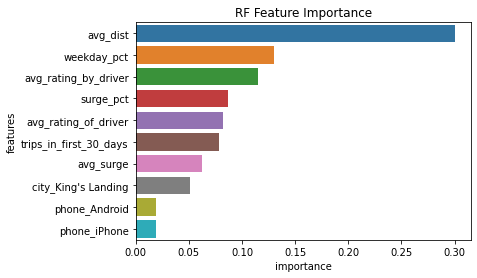

In [95]:
sns.barplot(feature_imp['importance'][:10], feature_imp['features'][:10])
plt.title("RF Feature Importance")

C:\Users\hanna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'RF Feature Importance')

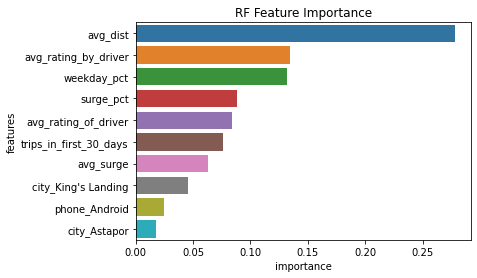

In [97]:
sns.barplot(feature_imp_2['importance'][:10], feature_imp_2['features'][:10])
plt.title("RF Feature Importance")

#### Conclusion

Some of the main features are:
- distance
- ratings
- rides during the dat
- surge

As a customer or driver, these features play an important part in whether to work or order a ride. A persons ratings disclose how well behaved they are while receiving/giving the service. One feature that we also see is "city_King's Landing". As a suggestion, we can point out the obvious, what is something that the city of Kings Landing have that others do not?

Counting the trips taken in the first 30 days is also an important feature per the model. Ultimate can base their promotion around that and offer discounts/promotions/packages that offers ultimate with a long-term relationship with the customer upon accepting the promotion. 